In [245]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

import pickle
from ipywidgets import interact
from collections import Counter
import time

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn                         # Perform data mining and analysis.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import imblearn
from imblearn.over_sampling import SMOTE

np.random.seed(1)

In [246]:
df = pd.read_csv('full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [200]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [201]:
df.shape

(4981, 11)

In [202]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [203]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [205]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [206]:
df.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  0.08   0             0              No            children       Urban           139.67             14.1  Unknown          0         1
Male    17.00  0             0              No            Private        Rural           94.92              23.5  never smoked     0         1
                                                                         Urban           85.07              21.1  never smoked     0         1
                                                                                         71.58              25.6  Unknown          0         1
                                                                                         63.28              40.2  Unknown          0         1
                                                                                                                                            ..
Fema

Preprocessing


In [207]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [208]:
df.duplicated().sum()

0

In [209]:
df['age'] = df['age'].astype(int)
print(df.dtypes)

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [210]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [211]:
df = df.replace('Unknown', np.nan)

In [212]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

In [213]:
cat_columns = ['gender', 'smoking_status']
df = pd.get_dummies(df, columns = cat_columns)
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,Yes,Private,Urban,228.69,36.6,1,0,1,1,0,0
1,80,0,1,Yes,Private,Rural,105.92,32.5,1,0,1,0,1,0
2,49,0,0,Yes,Private,Urban,171.23,34.4,1,1,0,0,0,1
3,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1,1,0,0,1,0
4,81,0,0,Yes,Private,Urban,186.21,29.0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,No,Private,Rural,70.15,29.8,0,0,1,1,0,0
4977,40,0,0,Yes,Private,Urban,191.15,31.1,0,0,1,0,0,1
4978,45,1,0,Yes,Govt_job,Rural,95.02,31.8,0,1,0,0,0,1
4979,40,0,0,Yes,Private,Rural,83.94,30.0,0,0,1,0,0,1


In [214]:
df.drop(columns=['ever_married','work_type','Residence_type'], inplace=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,0,1,1,0,0
1,80,0,1,105.92,32.5,1,0,1,0,1,0
2,49,0,0,171.23,34.4,1,1,0,0,0,1
3,79,1,0,174.12,24.0,1,1,0,0,1,0
4,81,0,0,186.21,29.0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,70.15,29.8,0,0,1,1,0,0
4977,40,0,0,191.15,31.1,0,0,1,0,0,1
4978,45,1,0,95.02,31.8,0,1,0,0,0,1
4979,40,0,0,83.94,30.0,0,0,1,0,0,1


In [215]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
#############################################################################

Outlaires


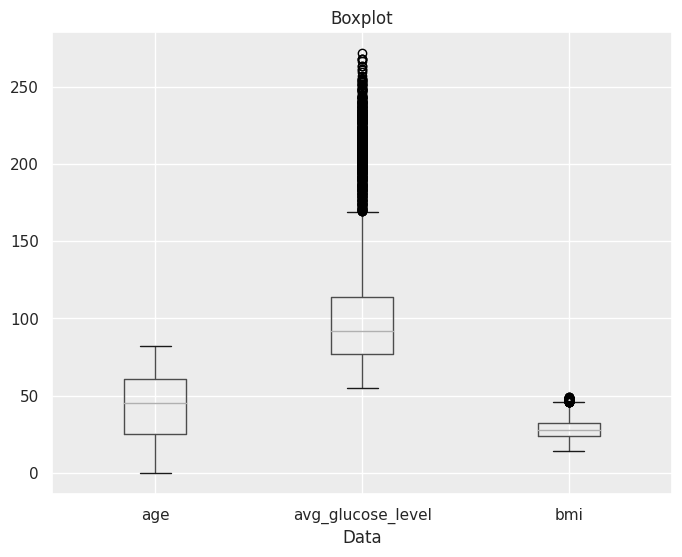

In [216]:
features = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(8, 6))
df[features].boxplot()
plt.title('Boxplot')
plt.xlabel('Data')
plt.show()

In [217]:
features = ['age', 'avg_glucose_level', 'bmi']

def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)
    print("Lower Bound:",lower)
    return upper, lower

print("age")
upper1, lower1 = limits(df['age'])
print("----------------------------------")
print("avg_glucose_level")
upper2, lower2 = limits(df['avg_glucose_level'])
print("----------------------------------")
print("bmi")
upper3, lower3 = limits(df['bmi'])

age
Upper Bound: 115.0
Lower Bound: -29.0
----------------------------------
avg_glucose_level
Upper Bound: 168.805
Lower Bound: 22.28500000000001
----------------------------------
bmi
Upper Bound: 45.95
Lower Bound: 10.349999999999996


In [218]:
outliers = df[(df['age'] < lower1) | (df['age'] > upper1)]
df = df.drop(outliers.index)

outliers = df[(df['avg_glucose_level'] < lower2) | (df['avg_glucose_level'] > upper2)]
df = df.drop(outliers.index)

outliers = df[(df['bmi'] < lower3) | (df['bmi'] > upper3)]
df = df.drop(outliers.index)

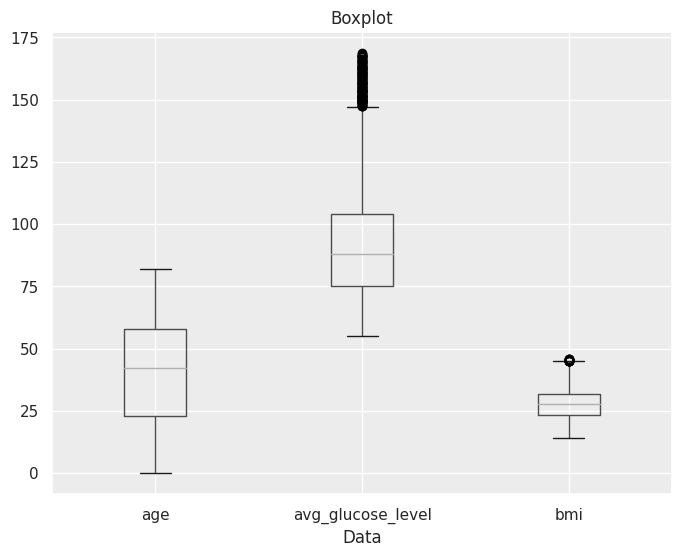

In [219]:
plt.figure(figsize=(8, 6))
df[features].boxplot()
plt.title('Boxplot')
plt.xlabel('Data')
plt.show()

train-test split

In [220]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=40,test_size=0.20, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3477, 10), (870, 10), (3477,), (870,))

In [221]:
y_train.value_counts(normalize = True).round(2)

0    0.96
1    0.04
Name: stroke, dtype: float64

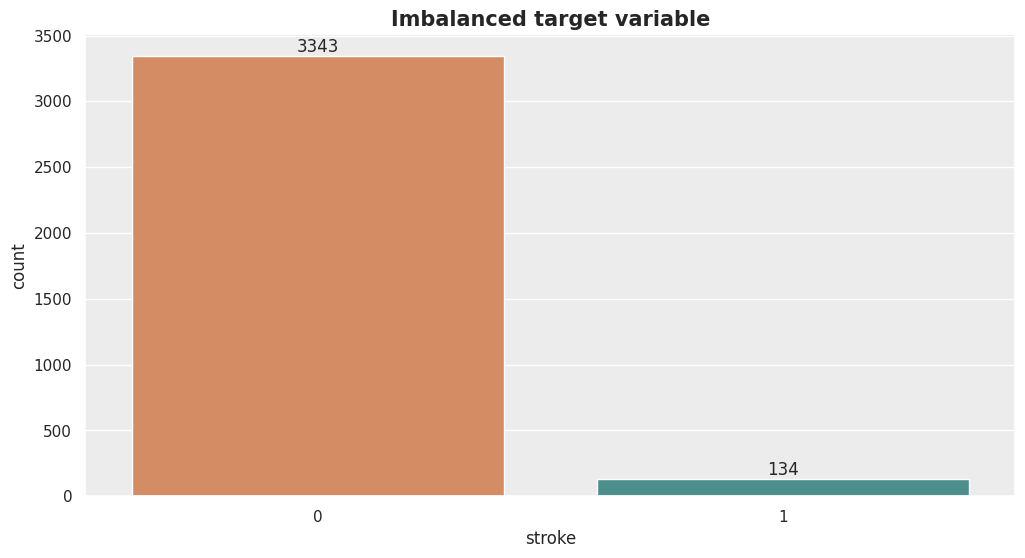

In [222]:
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_train, data=df, palette=['#E68753', '#409996'])

#add labels to each bar
abs_values = y_train.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#show the plot
plt.show()

In [223]:
smote = SMOTE(sampling_strategy='minority')
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)
X_SMOTE = pd.DataFrame(data = X_SMOTE, columns = X_SMOTE.columns)

In [224]:
print(f"Imbalanced target class: {Counter(y_train)}\n\nBalanced target class: {Counter(y_SMOTE)}\n")
print(X_SMOTE.shape[0] - df.shape[0], 'new random picked points')

Imbalanced target class: Counter({0: 3343, 1: 134})

Balanced target class: Counter({0: 3343, 1: 3343})

2339 new random picked points


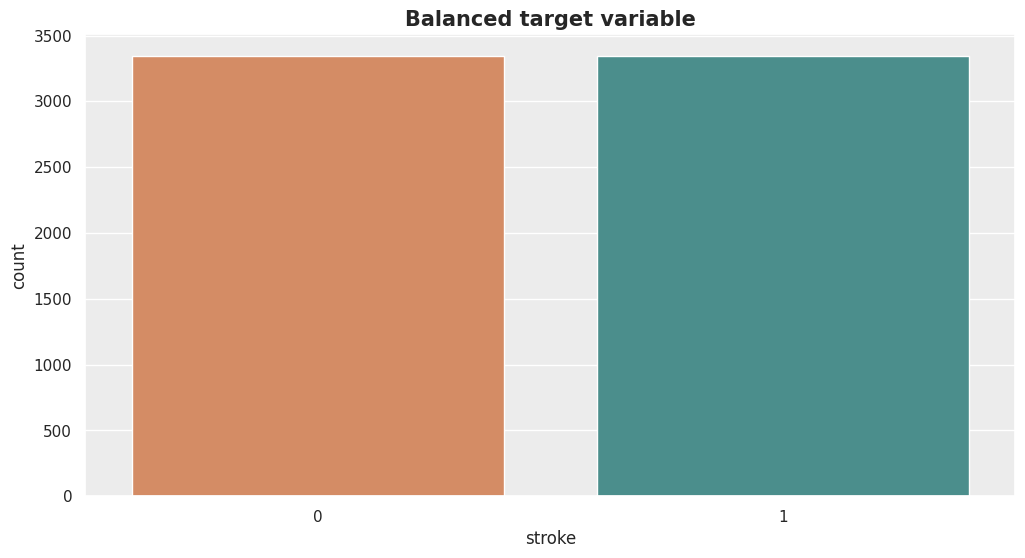

In [225]:
sns.set(rc={'axes.facecolor':'#ECECEC'})
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_SMOTE, data=df, palette=['#E68753', '#409996'])
plt.show()

In [226]:
def plot_conf_mtrix(name, y_pred, y_test):
    print()
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = plt.cm.Blues)
    ax.set_title(f'{name} Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    plt.show()

In [227]:
def cls_report(name, y_pred, y_test):
    print(f'{name} Classification Report :\n')
    print('-'*54)
    print()
    print(classification_report(y_test, y_pred))
    print('-'*54)
    print()
    print('Accuracy Score  : ' + str(round(accuracy_score(y_test, y_pred),3)))
    print('Precision Score : ' + str(round(precision_score(y_test, y_pred),3)))
    print('Recall Score    : ' + str(round(recall_score(y_test, y_pred),3)))
    print('F-Score         : ' + str(round(f1_score(y_test, y_pred),3)))

In [228]:
models = [LogisticRegression(), SVC(kernel = 'linear'), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]

def compare_model_train_test():
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        print('\n\nThe accuracy score of the ',model,' = ',accuracy)
        cls_report(model, y_pred, y_test)
        plot_conf_mtrix(model,y_pred,y_test)



The accuracy score of the  LogisticRegression()  =  0.964367816091954
LogisticRegression() Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       839
           1       0.00      0.00      0.00        31

    accuracy                           0.96       870
   macro avg       0.48      0.50      0.49       870
weighted avg       0.93      0.96      0.95       870

------------------------------------------------------

Accuracy Score  : 0.964
Precision Score : 0.0
Recall Score    : 0.0
F-Score         : 0.0



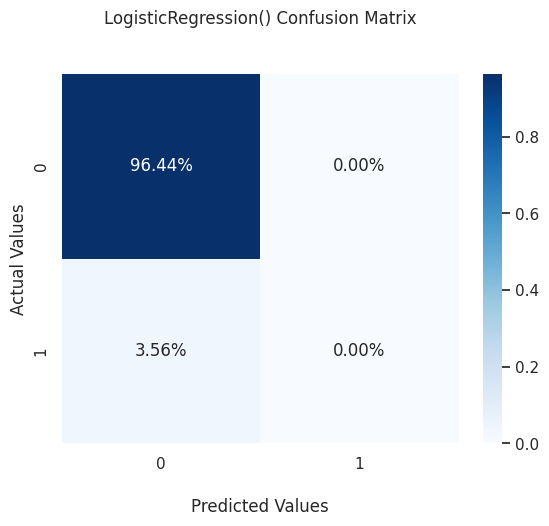



The accuracy score of the  SVC(kernel='linear')  =  0.964367816091954
SVC(kernel='linear') Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       839
           1       0.00      0.00      0.00        31

    accuracy                           0.96       870
   macro avg       0.48      0.50      0.49       870
weighted avg       0.93      0.96      0.95       870

------------------------------------------------------

Accuracy Score  : 0.964
Precision Score : 0.0
Recall Score    : 0.0
F-Score         : 0.0



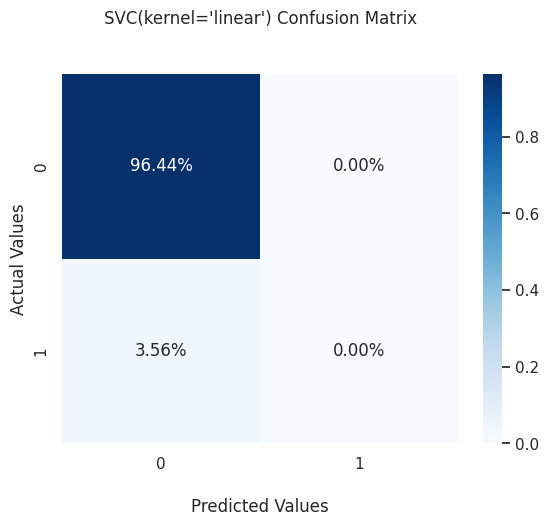



The accuracy score of the  KNeighborsClassifier()  =  0.964367816091954
KNeighborsClassifier() Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       839
           1       0.50      0.03      0.06        31

    accuracy                           0.96       870
   macro avg       0.73      0.52      0.52       870
weighted avg       0.95      0.96      0.95       870

------------------------------------------------------

Accuracy Score  : 0.964
Precision Score : 0.5
Recall Score    : 0.032
F-Score         : 0.061



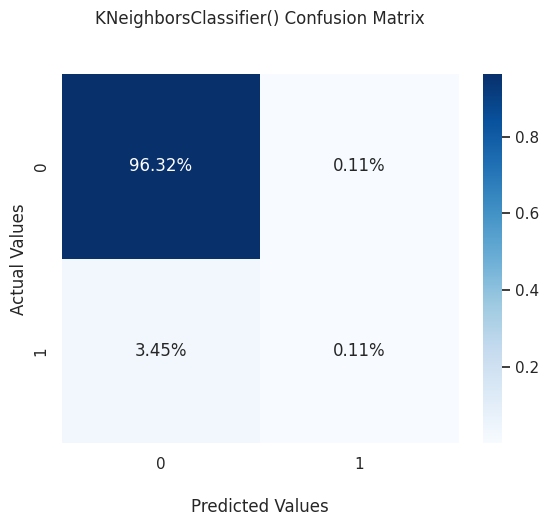



The accuracy score of the  RandomForestClassifier()  =  0.9632183908045977
RandomForestClassifier() Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       839
           1       0.43      0.10      0.16        31

    accuracy                           0.96       870
   macro avg       0.70      0.55      0.57       870
weighted avg       0.95      0.96      0.95       870

------------------------------------------------------

Accuracy Score  : 0.963
Precision Score : 0.429
Recall Score    : 0.097
F-Score         : 0.158



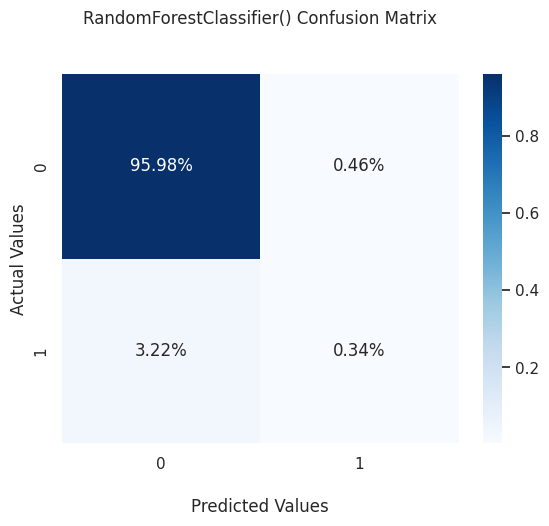



The accuracy score of the  DecisionTreeClassifier()  =  0.9298850574712644
DecisionTreeClassifier() Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       839
           1       0.00      0.00      0.00        31

    accuracy                           0.93       870
   macro avg       0.48      0.48      0.48       870
weighted avg       0.93      0.93      0.93       870

------------------------------------------------------

Accuracy Score  : 0.93
Precision Score : 0.0
Recall Score    : 0.0
F-Score         : 0.0



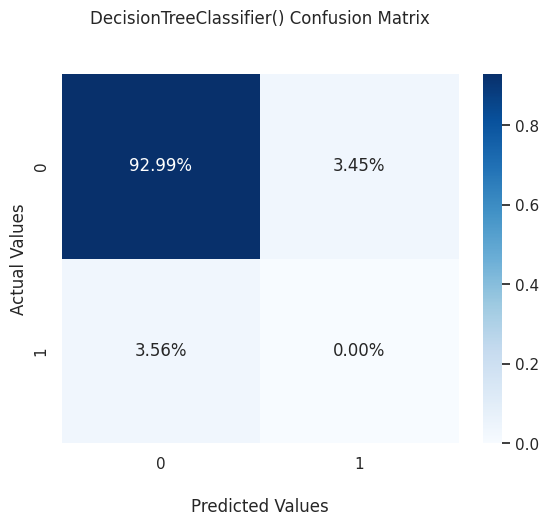

In [229]:
compare_model_train_test()

In [236]:
# fig = plt.figure(figsize = (25, 20));

# tree.plot_tree(
#     model,
#     feature_names = list(X),
#     class_names = ['Not Safe', 'Safe'],
#     max_depth = 2,
#     filled = True
# );

cross-validation split

In [237]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape)

smote_cv = SMOTE(sampling_strategy='minority')

X_SMOTE_cv, y_SMOTE_cv = smote_cv.fit_resample(X_train_cv, y_train_cv)
X_SMOTE_cv = pd.DataFrame(data = X_SMOTE_cv, columns = X_SMOTE_cv.columns)

(3912, 10) (435, 10) (3912,) (435,)


In [238]:
from sklearn.model_selection import cross_val_score

cross_validation_t_time = []
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    start = time.time()
    scores = cross_val_score(cv_models[model], X_SMOTE_cv, y_SMOTE_cv, cv = 10)
    end = time.time()
    print(f'{model} List of scores :\n{scores}')
    cross_validation_t_time.append(end - start)
    avg_scores = np.mean(scores)

    print(f'{model} Average Score : {avg_scores}\n')

    cross_validation_scores.append(avg_scores)

def compare_model_train_test():
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        print('\n\nThe accuracy score of the ',model,' = ',accuracy)
        cls_report(model, y_pred, y_test)
        plot_conf_mtrix(model,y_pred,y_test)

Logistic Regression List of scores :
[0.80212483 0.90305445 0.92961487 0.91367862 0.90039841 0.90039841
 0.89508632 0.90703851 0.89907039 0.88579017]
Logistic Regression Average Score : 0.8936254980079681

KNN List of scores :
[0.9123506  0.90703851 0.90438247 0.90172643 0.8937583  0.89110226
 0.90703851 0.90969456 0.90039841 0.88313413]
KNN Average Score : 0.901062416998672

SVM List of scores :
[0.77822045 0.79548473 0.79814077 0.80079681 0.75564409 0.76494024
 0.7622842  0.80345286 0.80478088 0.75830013]
SVM Average Score : 0.7822045152722443

Decision Tree List of scores :
[0.86321381 0.95086321 0.95484728 0.95883134 0.94555113 0.9561753
 0.94555113 0.96414343 0.95750332 0.93359894]
Decision Tree Average Score : 0.9430278884462153

Random Forest List of scores :
[0.88446215 0.97609562 0.98273572 0.97875166 0.96414343 0.97343958
 0.97211155 0.98273572 0.97609562 0.96812749]
Random Forest Average Score : 0.9658698539176627



In [239]:
print('Accuracies using Average Cross Validation :-\n')
for i, model in enumerate(cv_models):
    print(model, cross_validation_scores[i])

Accuracies using Average Cross Validation :-

Logistic Regression 0.8936254980079681
KNN 0.901062416998672
SVM 0.7822045152722443
Decision Tree 0.9430278884462153
Random Forest 0.9658698539176627


In [240]:
cv_rf = RandomForestClassifier()

cv_rf.fit(X_SMOTE_cv, y_SMOTE_cv)

y_pred = cv_rf.predict(X_test)

print('Accuracy for the best model using the fainal testing set :-')
print(accuracy_score(y_test, y_pred).round(4))

Accuracy for the best model using the fainal testing set :-
0.9943


GridSearchCV

In [242]:
training_time_hyp = []
prediction_time_hyp = []
training_scores_hyp = []
accuracies_hyp = []

In [243]:
X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_hyp.shape, X_test_hyp.shape, y_train_hyp.shape, y_test_hyp.shape)

smote_hyp = SMOTE(sampling_strategy='minority')

X_SMOTE_hyp, y_SMOTE_hyp = smote_hyp.fit_resample(X_train_hyp, y_train_hyp)
X_SMOTE_hyp = pd.DataFrame(data = X_SMOTE_hyp, columns = X_SMOTE_hyp.columns)

(3912, 10) (435, 10) (3912,) (435,)


In [247]:
lr_hyp = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet', 'none']
C       = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver  = ['lbfgs','newton-cg','liblinear','sag','saga']

lr_hyperparameters = dict(penalty=penalty, C=C, solver=solver)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=lr_hyp,
    param_grid=lr_hyperparameters,
    cv=cv,
    scoring='accuracy',
    return_train_score=True
)

start = time.time()
best_lr = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
lr_y_pred_hyp = best_lr.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_lr.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(lr_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, lr_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != lr_y_pred_hyp).sum()))

plot_conf_mtrix(best_lr.__class__.__name__, lr_y_pred_hyp, y_test_hyp)
cls_report(best_lr.__class__.__name__, lr_y_pred_hyp, y_test_hyp)

KeyboardInterrupt: ignored